In [12]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
def sigmoid(x: int,
            scaling: float = 2,
            shift: float = 0,
            ) -> float:
    return (1 + torch.exp(-x*scaling + shift))**-1

def sigmoid_loss(x: torch.Tensor) -> torch.Tensor:
    pixel_in_mm = 0.137
    el_pointing = 62
    distance = torch.arange(-el_pointing, x.shape[1]-el_pointing) * pixel_in_mm
    sig = sigmoid(distance)
    return x*sig

In [10]:
def sigmoid_loss(x: torch.Tensor, el_pointing=64, pixel_in_mm=0.137, device='cpu') -> torch.Tensor:
    distance = torch.arange(-el_pointing, x.shape[-1]-el_pointing, device=device) * pixel_in_mm
    sig = sigmoid(distance).to(device)
    return x*sig

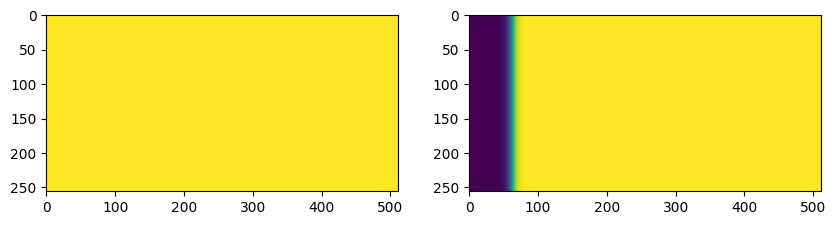

In [16]:
# path = "results/2nd_phys_spec_1000ns/5.png" # torch.ones(256, 256)
# transform = transforms.ToTensor()
# image = Image.open(path)
# input = transform(image).squeeze()
input = torch.ones((256,512))

output = sigmoid_loss(input)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(input, vmin=0, vmax=1)
axs[1].imshow(output, vmin=0, vmax=1)